# Introduction to Exploratory Data Analysis (EDA): Boston vs. Seattle Airbnb

In this project, I aim to apply the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology to explore and analyze Airbnb data. The primary focus will be on addressing key business questions using datasets provided by Airbnb through Udacity. The analysis will center on two major U.S. cities: Boston and Seattle.

While my initial interest lies in comparing pricing trends between the two cities, I anticipate that a deeper dive into the datasets will help me formulate more specific and insightful questions. This exploratory data analysis (EDA) will serve as the foundation for uncovering patterns, trends, and potential insights that can inform decision-making and strategy for Airbnb stakeholders.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pd.set_option('display.max_columns', None)

## 1. Business Understanding
### Set 1: Seattle Dataset
Seattle Listings

In [9]:
seattle_listings = pd.read_csv('./data/seattle_listings.csv')
seattle_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
print(f"There are a total of {seattle_listings.shape[0]} rows.")
print(f"There are a total of {seattle_listings.shape[1]} columns.")

There are a total of 3818 rows.
There are a total of 92 columns.


Seattle Calendar

In [10]:
seattle_calendar = pd.read_csv('./data/seattle_calendar.csv')
seattle_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
print(f"There are a total of {seattle_calendar.shape[0]} rows.")
print(f"There are a total of {seattle_calendar.shape[1]} columns.")

There are a total of 1393570 rows.
There are a total of 4 columns.


In [6]:
seattle_min_date = seattle_calendar.date.min()
seattle_max_date = seattle_calendar.date.max()

print(f"The date range for Seattle's listings is {seattle_min_date} to {seattle_max_date}.")

The date range for Seattle's listings is 2016-01-04 to 2017-01-02.


Seattle Reviews

In [11]:
seattle_reviews = pd.read_csv('./data/seattle_reviews.csv')
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
print(f"There are a total of {seattle_reviews.shape[0]} rows.")
print(f"There are a total of {seattle_reviews.shape[1]} columns.")

There are a total of 84849 rows.
There are a total of 6 columns.


### Set 2: Boston Dataset

Boston Listings

In [13]:
boston_listings = pd.read_csv('./data/boston_listings.csv')
boston_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [14]:
print(f"There are a total of {boston_listings.shape[0]} rows.")
print(f"There are a total of {boston_listings.shape[1]} columns.")

There are a total of 3585 rows.
There are a total of 95 columns.


Boston Calendar

In [15]:
boston_calendar = pd.read_csv('./data/boston_calendar.csv')
boston_calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [16]:
print(f"There are a total of {boston_calendar.shape[0]} rows.")
print(f"There are a total of {boston_calendar.shape[1]} columns.")

There are a total of 1308890 rows.
There are a total of 4 columns.


In [17]:
boston_min_date = boston_calendar.date.min()
boston_max_date = boston_calendar.date.max()

print(f"The date range for Seattle's listings is {boston_min_date} to {boston_max_date}.")

The date range for Seattle's listings is 2016-09-06 to 2017-09-05.


Boston Reviews

In [20]:
boston_reviews = pd.read_csv('./data/boston_reviews.csv')
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [21]:
print(f"There are a total of {boston_reviews.shape[0]} rows.")
print(f"There are a total of {boston_reviews.shape[1]} columns.")

There are a total of 68275 rows.
There are a total of 6 columns.


#### Observations

1. **Listings Comparison**:  
   Seattle has slightly more unique listings than Boston, with approximately 300 additional listings.

2. **Data Timeframe**:  
   The datasets for both cities cover a one-year period, but the data is not recent. Based on the `calendar.csv` files, the data spans from 2016 to 2017, with different start dates for each city.

3. **Reviews Analysis**:  
   Seattle has significantly more reviews compared to Boston. This could suggest that properties in Seattle have shorter average occupancy periods.

4. **Neighbourhood Data**:  
   In the Boston dataset, the `neighbourhood_group_cleansed` column contains only null values. Therefore, it would be more appropriate to use the `neighbourhood_cleansed` column for neighborhood-based comparisons.

#### Research Questions

After an initial review of the datasets, the following questions have emerged as key areas of interest for this project:

1. **Amenities Comparison**:  
   What are the most important amenities for listings in each city, and how do they differ between Seattle and Boston?

2. **Price Prediction**:  
   Can listing prices be accurately predicted using 8 key features? If so, how do the predictive models compare between the two cities?

3. **Monthly Price Trends**:  
   How do listing prices fluctuate on a monthly basis in each city? How do these trends compare between Seattle and Boston?

4. **Monthly Listings Trends**:  
   How does the total number of listings change each month in each city? What are the differences in these trends between Seattle and Boston?

## 2. Data Understanding

Before diving into the fun and detailed analysis, it's crucial to develop a solid understanding of each dataset. During this exploratory phase, I don’t expect to answer any specific questions right away, but there’s always a chance for unexpected insights. In fact, this process might even lead to more questions!


### Neighbourhood Distribution in Seattle and Boston:

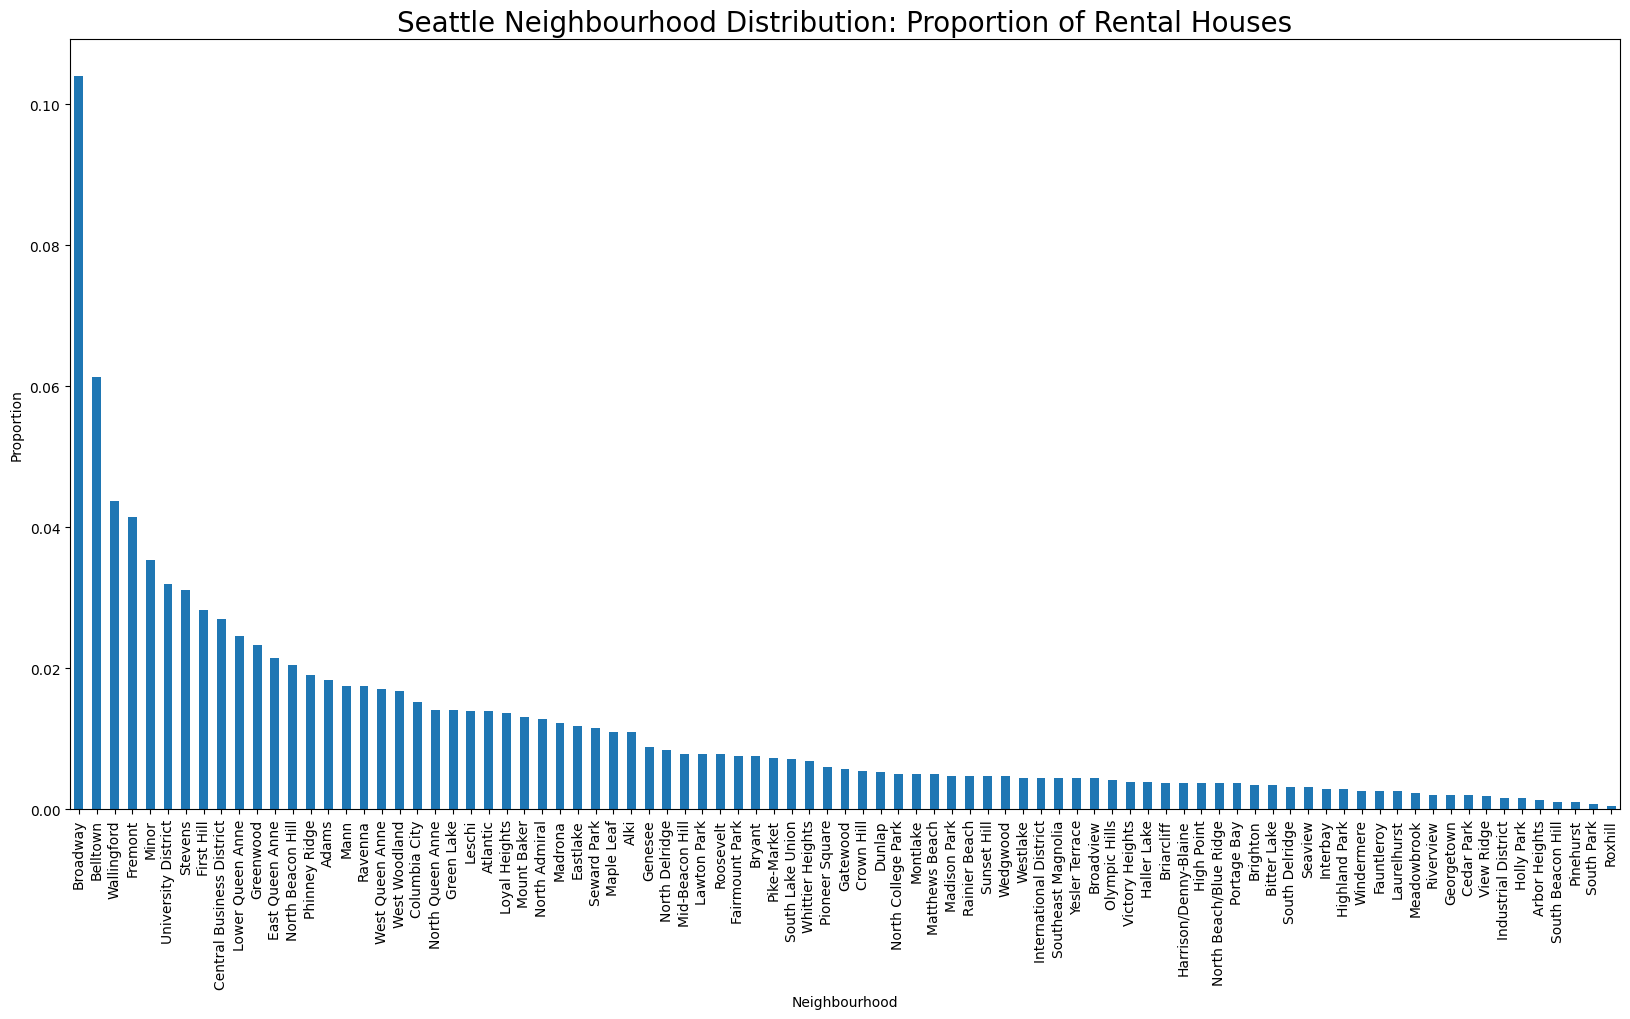

In [22]:
plt.rcParams['figure.figsize'] = [20, 10] #set figure size

seattle_neighbourhood = seattle_listings['neighbourhood_cleansed'].value_counts()
(seattle_neighbourhood/seattle_listings.shape[0]).plot(kind = 'bar')
plt.title('Seattle Neighbourhood Distribution: Proportion of Rental Houses', fontsize = 20)
plt.savefig('Seattle Neighbourhood Distribution.png')
plt.xlabel('Neighbourhood')
plt.ylabel('Proportion');

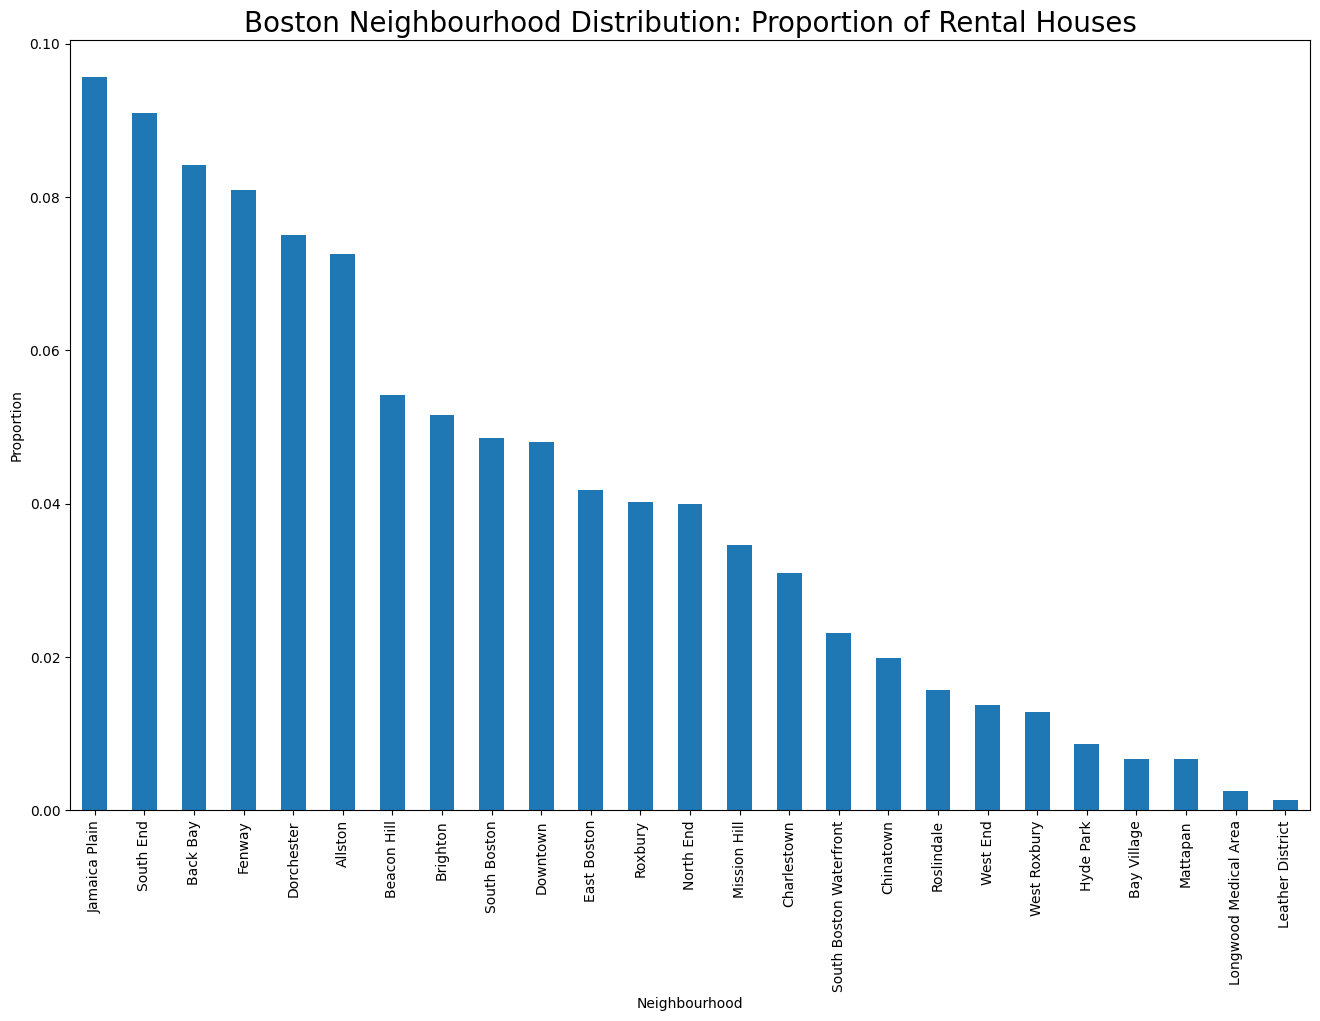

In [23]:
plt.rcParams['figure.figsize'] = [16, 10] #set figure size

boston_neighbourhood = boston_listings['neighbourhood_cleansed'].value_counts()
(boston_neighbourhood/boston_listings.shape[0]).plot(kind = 'bar')
plt.title('Boston Neighbourhood Distribution: Proportion of Rental Houses', fontsize = 20)
plt.savefig('Boston Neighbourhood Distribution.png')
plt.xlabel('Neighbourhood')
plt.ylabel('Proportion');

### Neighbourhood Notes

1. **Number of Neighbourhoods**:  
   Seattle has a greater number of neighbourhoods with rental properties compared to Boston. This could simply be due to Seattle having more neighbourhoods overall than Boston.

2. **Top Neighbourhood in Seattle**:  
   In Seattle, the top neighbourhood (Broadway) is the only one that accounts for a double-digit percentage of listings. The next highest neighbourhood represents only half of Broadway's proportion.

### Boxplot: Prices Range By Neighbourhood

In [24]:
boston_listings['price'].sort_values() #need to clean up the values before we can plot and analyze


1764    $1,000.00
3242    $1,000.00
1896    $1,235.00
3096    $1,250.00
1262    $1,250.00
          ...    
805        $99.00
1560       $99.00
1112       $99.00
879        $99.00
2485      $999.00
Name: price, Length: 3585, dtype: object

In [28]:
#Get rid of "," and convert to 'price' column to integer
boston_listings['int_price'] = boston_listings['price'].map(lambda x: int(x[1:-3].replace(",","")))

In [29]:
def clean_price(df):
    '''
    INPUT:
    df - pandas dataframe with categorical variables that I want to clean
    
    OUTPUT:
    df - a new dataframe with the following characteristics:
        1. new column with cleaned price as an integer
    '''
    df['int_price'] = df['price'].map(lambda x: int(x[1:-3].replace(",","")))
    return df

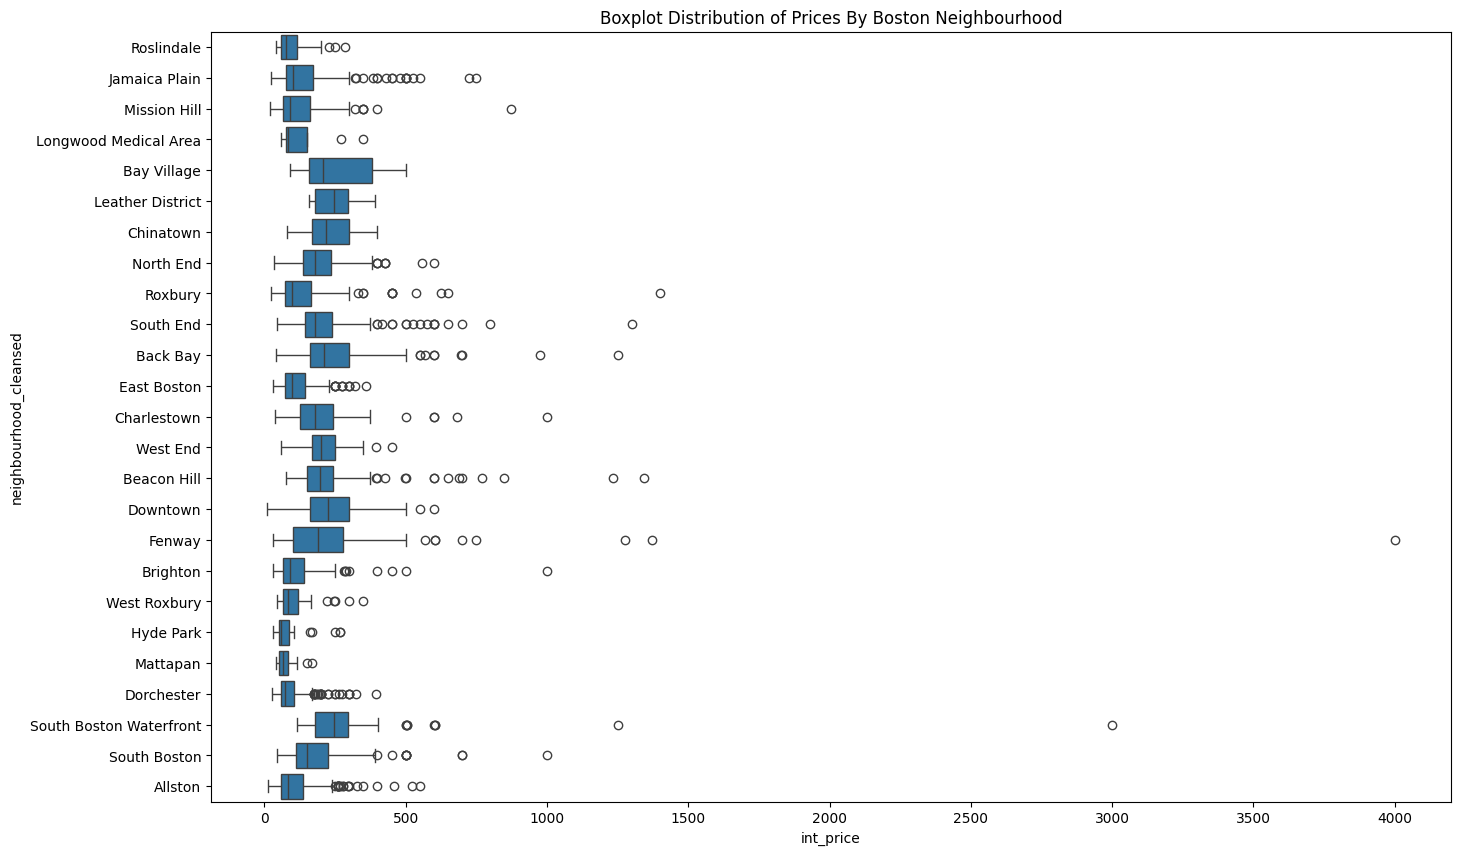

In [30]:
df = boston_listings
df = clean_price(df)

plt.rcParams['figure.figsize'] = [16, 10] #set figure size
sb.boxplot(x = 'int_price', y = 'neighbourhood_cleansed', data = df)
plt.title("Boxplot Distribution of Prices By Boston Neighbourhood");

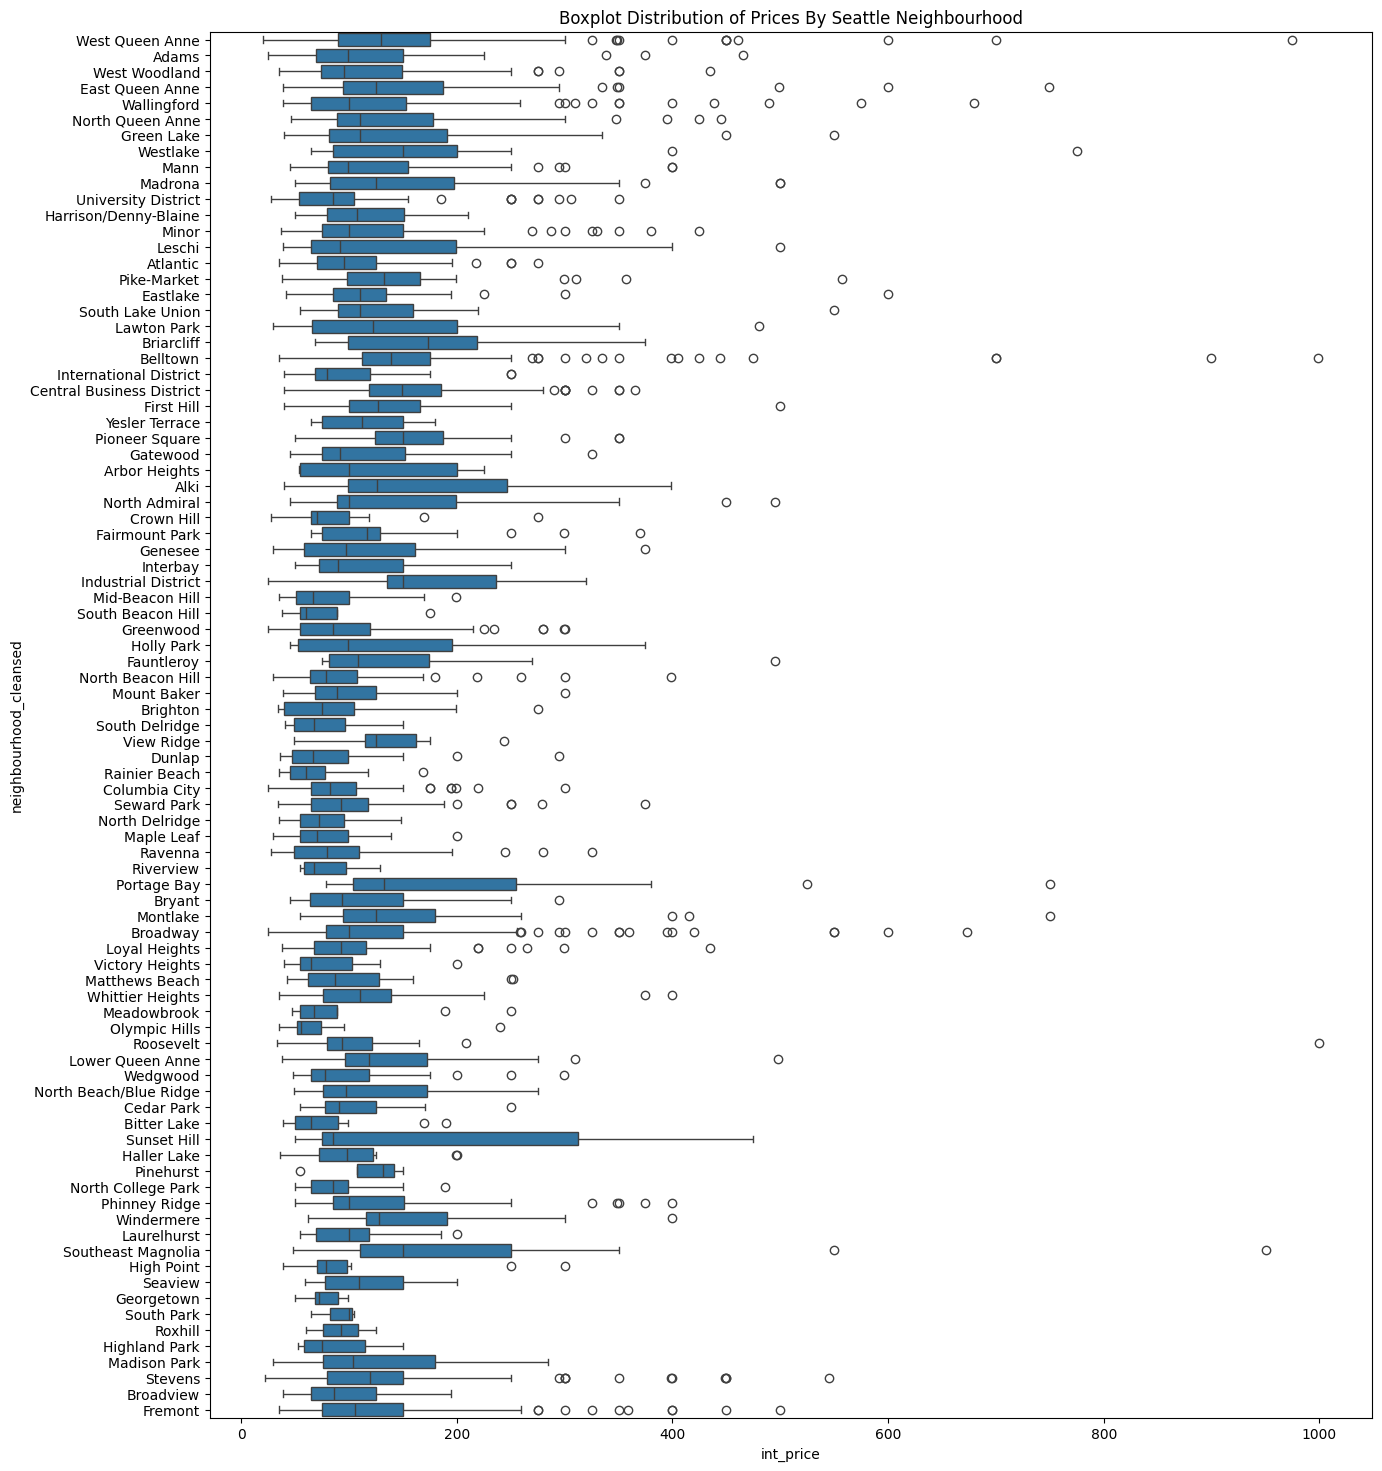

In [31]:
df = seattle_listings
df = clean_price(df)

plt.rcParams['figure.figsize'] = [15, 18] #set figure size
sb.boxplot(x = 'int_price', y = 'neighbourhood_cleansed', data = df)
plt.title("Boxplot Distribution of Prices By Seattle Neighbourhood");

### Neighbourhood and Prices Notes

1. **Outliers and Price Comparison**:  
   Both datasets contain a significant number of outliers. However, when visually comparing the two cities, it's evident that Seattle's neighbourhood rentals are, on average, more expensive and exhibit a much wider range (IQR).

2. **Handling Outliers**:  
   Due to the presence of numerous outliers, it's challenging to analyze the data effectively. To address this, I will trim the outliers to focus on listings with prices less than or equal to the largest overall maximum of the IQR for each city. Instead of relying on the `describe()` function, this analysis will be derived visually for better clarity.

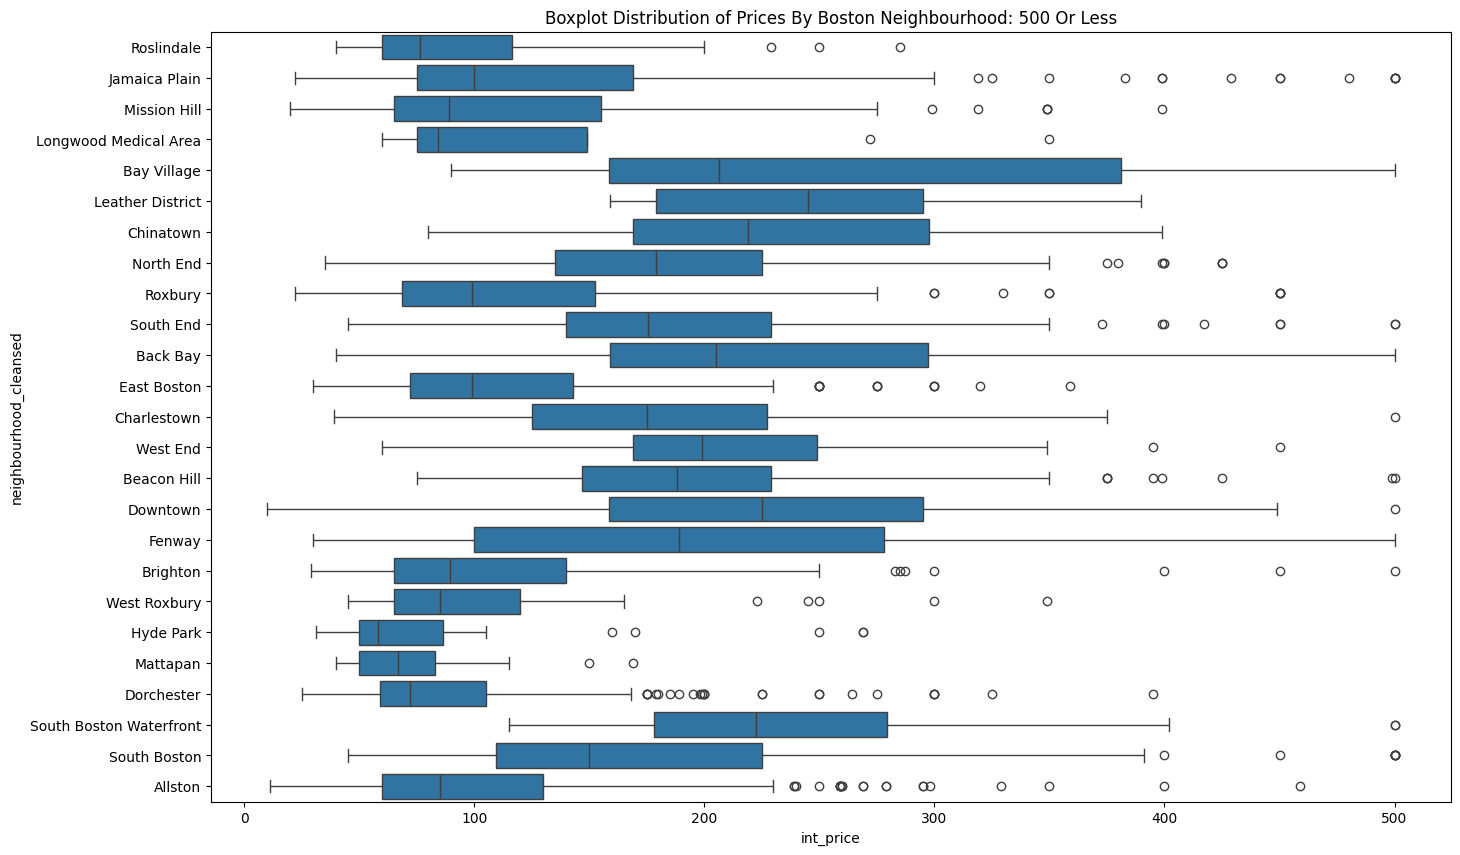

In [32]:
df = boston_listings
df = clean_price(df)

plt.rcParams['figure.figsize'] = [16, 10] #set figure size
#Get rid of "," and convert to 'price' column to integer
#boston_listings['int_price'] = boston_listings['price'].map(lambda x: int(x[1:-3].replace(",","")))

sb.boxplot(x = 'int_price', y = 'neighbourhood_cleansed',
           data = boston_listings[df['int_price'] <= 500])
plt.title("Boxplot Distribution of Prices By Boston Neighbourhood: 500 Or Less")
plt.savefig('Boxplot Distribution of Prices By Boston Neighbourhood.png');

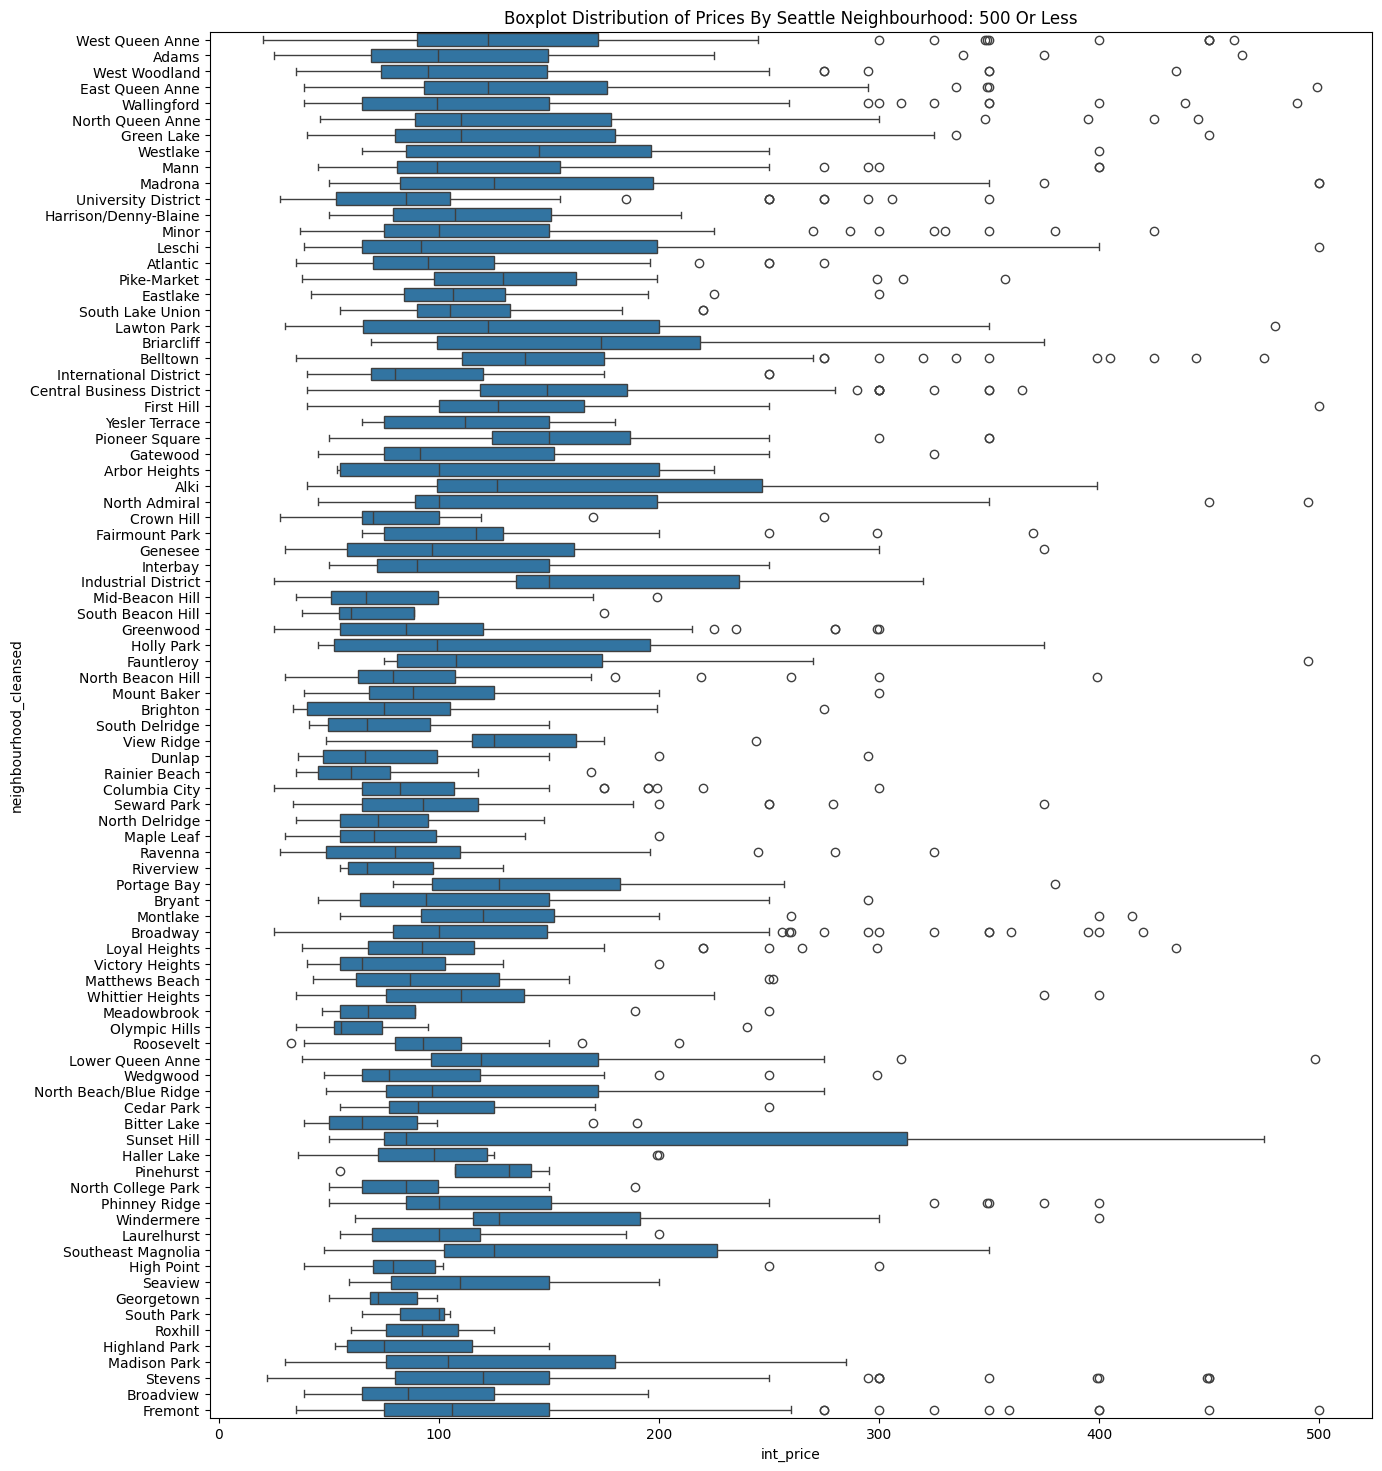

In [33]:
df = seattle_listings
df = clean_price(df)

plt.rcParams['figure.figsize'] = [15, 18] #set figure size
#Get rid of "," and convert to 'price' column to integer
#seattle_listings['int_price'] = seattle_listings['price'].map(lambda x: int(x[1:-3].replace(",","")))

sb.boxplot(x = 'int_price', y = 'neighbourhood_cleansed',
           data = seattle_listings[df['int_price'] <= 500])
plt.title("Boxplot Distribution of Prices By Seattle Neighbourhood: 500 Or Less")
plt.savefig('Boxplot Distribution of Prices By Seattle Neighbourhood.png');

### More Neighbourhood and Prices Notes

1. **Boston**:  
   With a clearer view after trimming outliers, the Leather District neighbourhood stands out as having the highest mean price in Boston.

2. **Seattle**:  
   In Seattle, the mean prices are generally lower and more closely clustered compared to Boston. Among these, Braircliff has the highest mean price.

### Lineplot Of Neighbourhoods Average Ratings

Seattle

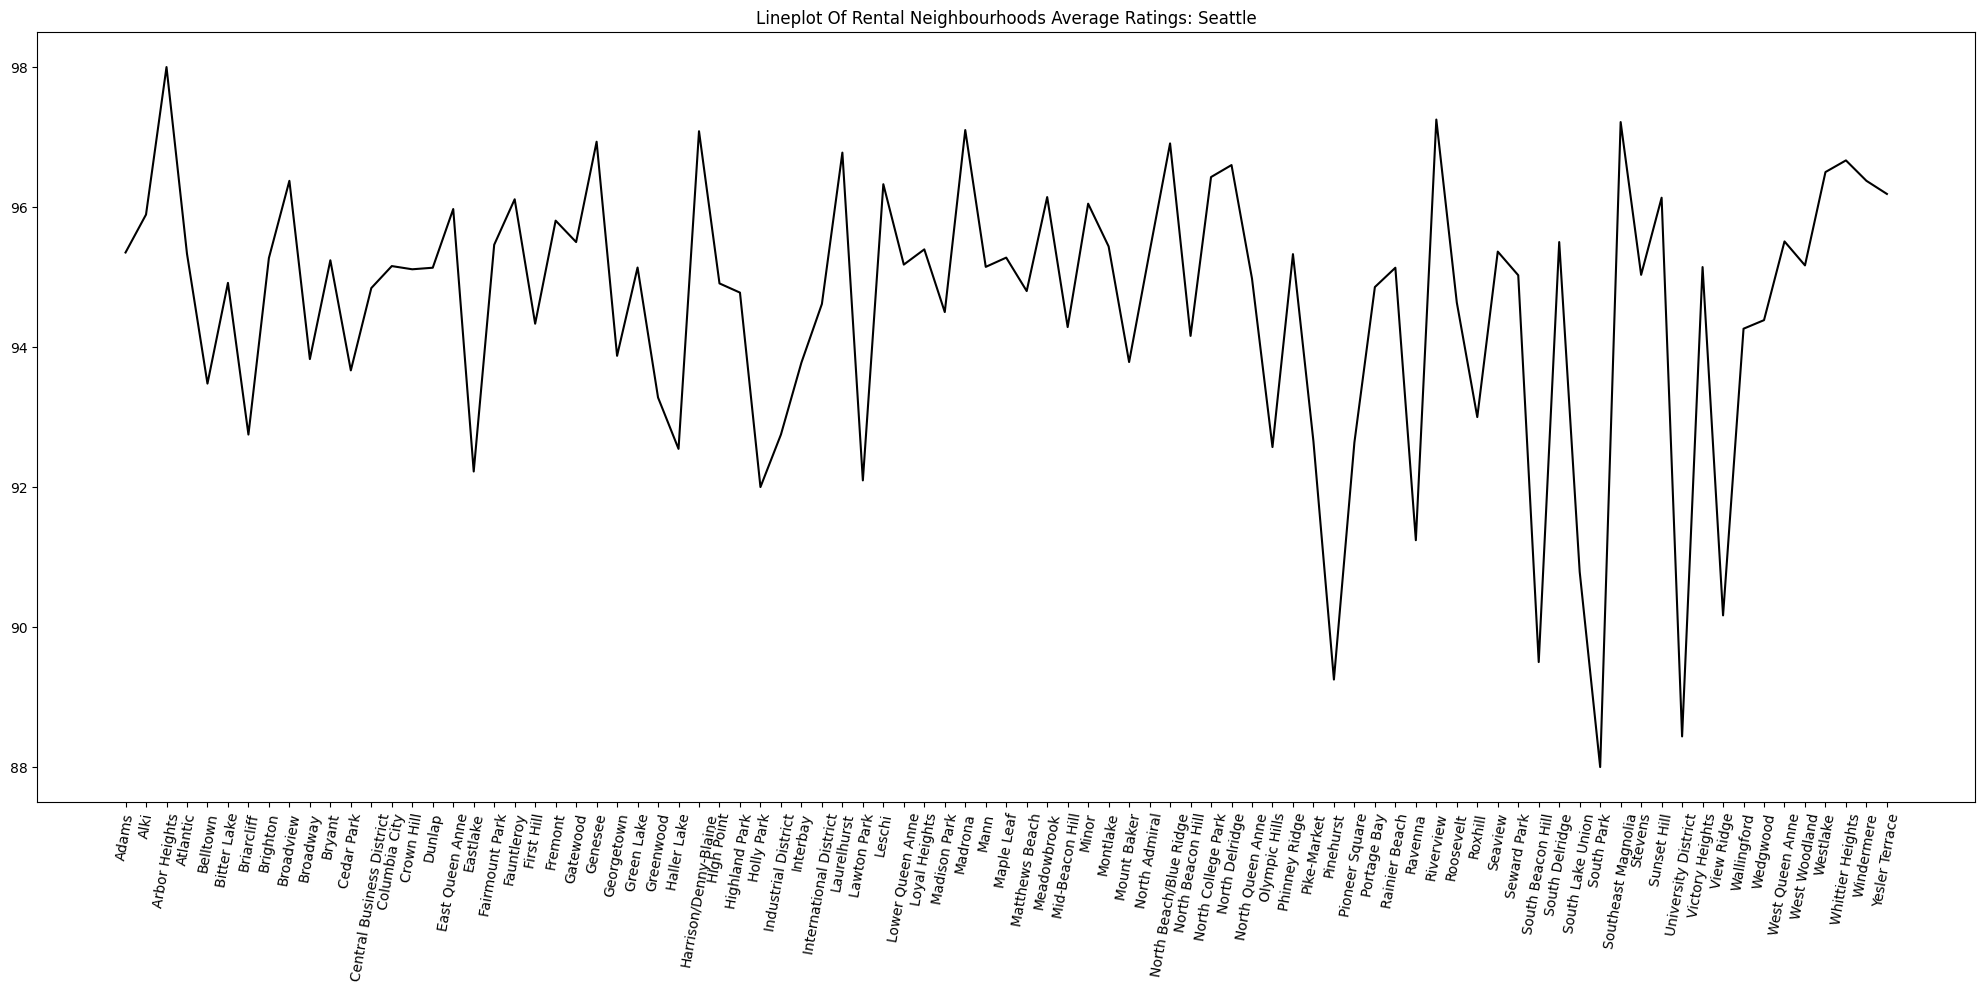

In [34]:

plt.rcParams['figure.figsize'] = [25, 10] #set figure size
neighbourhood_ratings = seattle_listings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
plt.plot(neighbourhood_ratings, color = "black")
plt.xticks(rotation = 80)
plt.title('Lineplot Of Rental Neighbourhoods Average Ratings: Seattle')
plt.savefig('Lineplot Of Rental Neighbourhoods Average Ratings: Seattle.png');

Boston

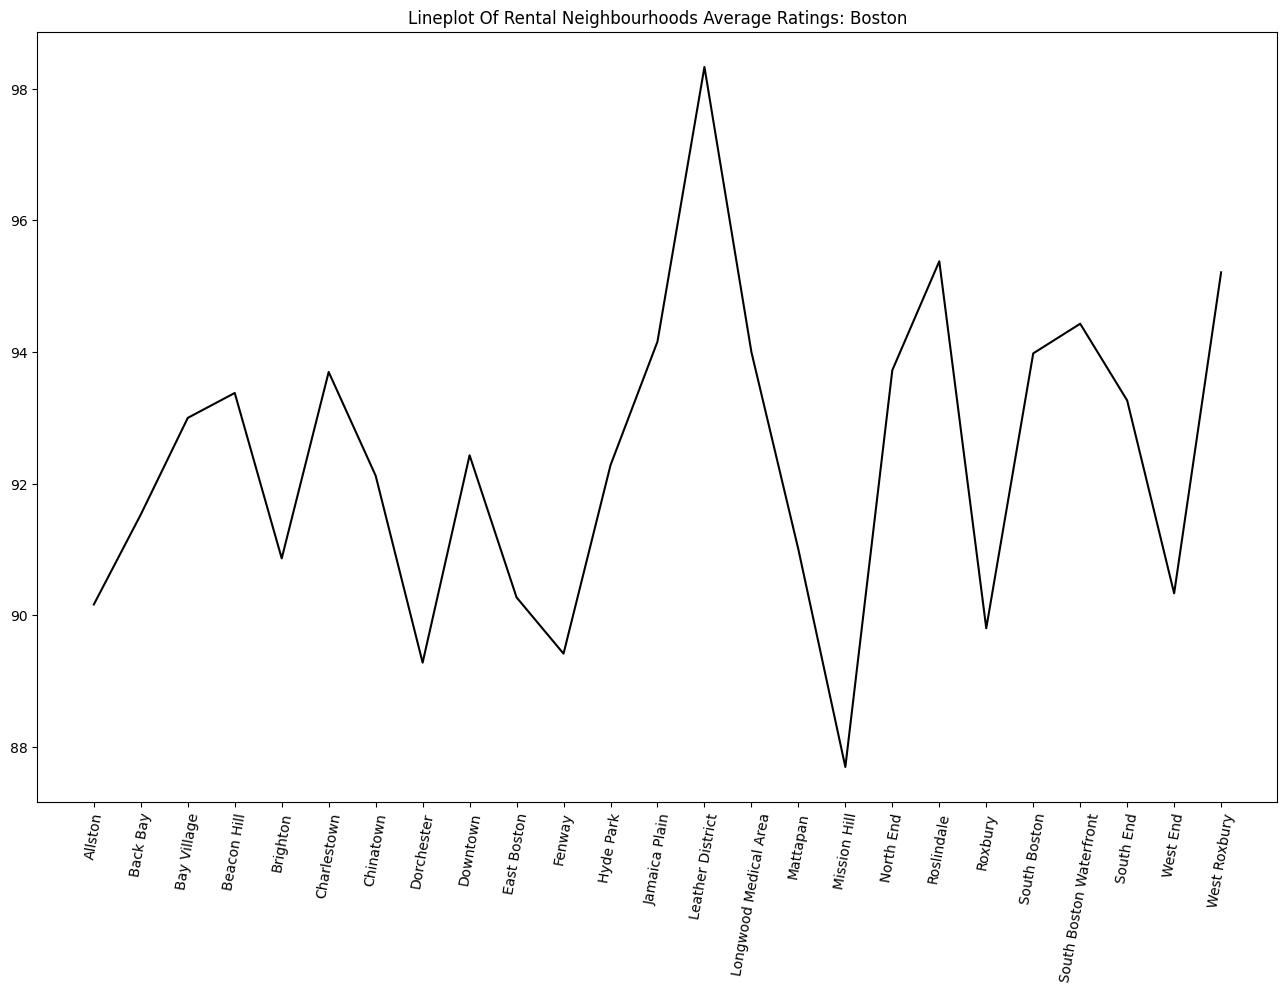

In [35]:

plt.rcParams['figure.figsize'] = [16, 10] #set figure size
neighbourhood_ratings = boston_listings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
plt.plot(neighbourhood_ratings, color = 'black')
plt.xticks(rotation = 80)
plt.title('Lineplot Of Rental Neighbourhoods Average Ratings: Boston')
plt.savefig('Lineplot Of Rental Neighbourhoods Average Ratings: Boston.png');

### Average Rating Notes

1. **Seattle**:  
   Based on the plot of average ratings for each Seattle neighbourhood, the ratings are generally high, with most hovering around 93. The Alki neighbourhood has the highest average rating.

2. **Boston**:  
   In the Boston line plot, the average ratings are slightly lower, ranging between 90 and 94. The Leather District, which also has the highest average price, boasts the highest rating. Conversely, Mission Hill has the lowest average rating.

### Examining One Listing From Each Dataset

To gain deeper insights, I will examine a single listing from each city using the `listing_id` column. This will allow for a more detailed analysis of individual properties in both Seattle and Boston.

Boston

In [37]:
boston_listings.head(5) # let's examine id = 6976

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,int_price
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN,250
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 021

In [38]:
boston_calendar[boston_calendar['listing_id'] == 6976].head(25)

,listing_id,date,available,price
730,6976,2017-05-12,t,$65.00
731,6976,2017-05-11,t,$65.00
732,6976,2017-05-10,t,$65.00
733,6976,2017-05-09,t,$65.00
734,6976,2017-05-08,t,$65.00
735,6976,2017-05-07,t,$65.00
736,6976,2017-05-06,t,$65.00
737,6976,2017-05-05,t,$65.00
738,6976,2017-05-04,t,$65.00
739,6976,2017-05-03,t,$65.00


In [39]:
boston_reviews[boston_reviews['listing_id'] == 6976].head(25)

,listing_id,id,date,reviewer_id,reviewer_name,comments
57563,6976,5808,2009-07-19,23549,Gary,"A Wonderful, pleasant, and charming host. The..."
57564,6976,67912,2010-07-23,154097,Dominik,Firstly Phil is a great host! He's very helpfu...
57565,6976,277461,2011-05-23,232785,Aviva,Phil was a great host and his home was very co...
57566,6976,341306,2011-06-28,579421,Daniela,Phil is a very friendly host and I felt safe a...
57567,6976,393798,2011-07-24,824245,Carlos,"Firstly, the room itself was very comfortable ..."
57568,6976,660258,2011-10-24,1246312,Kei,"The room was very comfortable, with clean and ..."
57569,6976,685634,2011-11-01,812255,Stephanie,Phil was very accommodating to both my short n...
57570,6976,1382998,2012-05-30,1634171,Laura,Phil was a great host. He was accomodating an...
57571,6976,1591064,2012-06-29,2643567,Prajakt,Phil is a wonderful host. The house is located...
57572,6976,2034401,2012-08-19,3143289,Maciek,My stay at Phil's was great. Phil is a great h...


### Boston ID Notes - Data Understanding

1. **Property Rental Trends**:  
   For this particular Boston property, it appears that the owner has had difficulty renting it out. Upon further examination, the owner's acceptance rate might be a contributing factor to this trend.

2. **Reviews Database**:  
   At this stage, I do not have any specific comments or insights regarding the reviews database.


Seattle

In [40]:
seattle_listings.head(5) # let's examine id = 241032

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,int_price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,150
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New M

In [41]:
seattle_calendar[seattle_calendar['listing_id'] == 241032].head(25)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [42]:

seattle_reviews[seattle_reviews['listing_id'] == 241032].head(25)

,listing_id,id,date,reviewer_id,reviewer_name,comments
46381,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
46382,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
46383,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
46384,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
46385,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...
46386,241032,739809,2011-11-23,620277,Robin,I had a wonderful 4 night stay in Maija's apar...
46387,241032,746462,2011-11-27,1261162,Mara,The apartment was really nice and homey. It wa...
46388,241032,755647,2011-11-30,719078,Kiran,I stayed at Maija's place for 3 days and had n...
46389,241032,764019,2011-12-05,693268,Tatyana,"I did booking for my sister, and she liked the..."
46390,241032,773602,2011-12-09,1243196,Sal,We were unintentionally poor guests; we broke ...


### Seattle ID Notes - Data Understanding

1. **Price Consistency and Null Values**:  
   In this case, the listing price aligns with the price in the calendar dataset. However, the presence of null values is noteworthy. From the dataset, we know the property is unavailable, but the ordering of these null values raises questions about potential price changes. Additionally, it prompts the question: *"Even if owners don't remove their listings from the market, do they adjust prices based on the day?"*

2. **Reviews Database**:  
   At this stage, I do not have any specific comments or insights regarding the reviews database.

3. **Further Examination**:  
   Before proceeding, I would like to examine one more listing that I found particularly interesting.

In [43]:
seattle_listings.head(5) # let's examine id = 278830
seattle_listings[seattle_listings['id'] == 278830]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,int_price
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...,NaN,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,NaN,NaN,$700.00,$125.00,6,$15.00,1,1125,7 weeks ago,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,450


In [44]:
seattle_calendar[seattle_calendar['listing_id'] == 278830].head(30)

,listing_id,date,available,price
1460,278830,2016-01-04,t,$600.00
1461,278830,2016-01-05,t,$600.00
1462,278830,2016-01-06,t,$600.00
1463,278830,2016-01-07,t,$600.00
1464,278830,2016-01-08,t,$600.00
1465,278830,2016-01-09,t,$600.00
1466,278830,2016-01-10,t,$500.00
1467,278830,2016-01-11,t,$500.00
1468,278830,2016-01-12,t,$500.00
1469,278830,2016-01-13,t,$500.00


### Price Discrepancy Analysis

In this case, there is a noticeable difference between the price listed in the `listings` dataset and the `calendar` dataset. Specifically:

- The **listings dataset** shows a fixed price of **$450**.
- The **calendar dataset** starts with a price of **$600**, which gradually decreases over time.

This discrepancy could indicate that the owner is actively trying to rent out the property as quickly as possible to generate income, potentially by lowering the price to attract more bookings.